In [2]:
import numpy as np
import torch
from torchvision import datasets, transforms
import bcd.helpers as helpers
from bcd.ModelBCD import ModelBCD

%load_ext autoreload
%autoreload 2



In [3]:
# Convert to tensor and scale to [0, 1]
ts = transforms.Compose([transforms.ToTensor(),
                         transforms.Normalize((0,), (1,))])
mnist_trainset = datasets.MNIST(root='data', train=True, download=True, transform=ts)
mnist_testset = datasets.MNIST(root='data', train=False, download=True, transform=ts)


In [4]:
x_train, y_train, y_train_1hot, x_test, y_test, y_test_1hot = helpers.preprocess_data(mnist_trainset, mnist_testset)

In [5]:
gamma = alpha = rho = 1
classes = 10
input_layer_size, n_samples_train = x_train.size()
_, n_samples_test = x_test.size()

# Layers: input + 3 hidden + output
layer_1_size = layer_2_size = layer_3_size = 200

In [14]:
w1 = 0.01*torch.randn(100, 10)
b1 = torch.ones(100, 1)
x = torch.randn(100)

In [31]:
b1.repeat(1, 100).size()

torch.Size([100, 100])

In [8]:
model = ModelBCD(input_layer_size, layer_1_size, layer_2_size, layer_3_size, classes, gamma, alpha, rho)

In [9]:
n_iter = 60
loss = np.empty(n_iter)
accuracies_train = np.empty(n_iter)
accuracies_test = np.empty(n_iter)

model.init_aux_params(x_train)


In [8]:
y_train_1hot.size()

torch.Size([10, 60000])

In [11]:
# TODO add time measurements

print('Train on', n_samples_train, 'samples, validate on', n_samples_test, 'samples')
for k in range(n_iter):
    model.update_params(y_train_1hot, x_train)

    train_output = model.forward(x_train)

    # training prediction
    pred_train = torch.argmax(train_output, dim=0)

    test_output = model.forward(x_test)

    # test/validation prediction
    pred_test = torch.argmax(test_output, dim=0)

    # compute training loss
    loss[k] = gamma / 2 * torch.pow(torch.dist(model.V4, y_train_1hot, 2), 2)

    # compute training accuracy
    correct_train = pred_train == y_train
    accuracies_train[k] = np.mean(correct_train.numpy())

    # compute validation accuracy
    correct_test = pred_test == y_test
    accuracies_test[k] = np.mean(correct_test.numpy())

    # print results
    print(
        f"Epoch: {k + 1} / {n_iter} \n loss: {loss[k]:.4f} - acc:{accuracies_train[k]:.4f} - val_acc:{accuracies_test[k]:.4f}")


Train on 60000 samples, validate on 10000 samples
Epoch: 1 / 60 
 loss: 7701.4805 - acc:0.6754 - val_acc:0.6827
Epoch: 2 / 60 
 loss: 5343.8916 - acc:0.8080 - val_acc:0.8179


KeyboardInterrupt: 

figures generated and saved in root directory


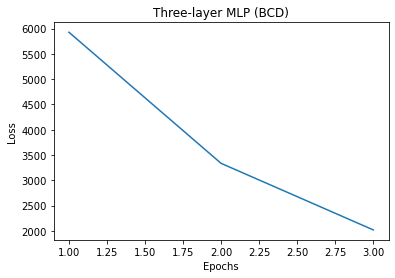

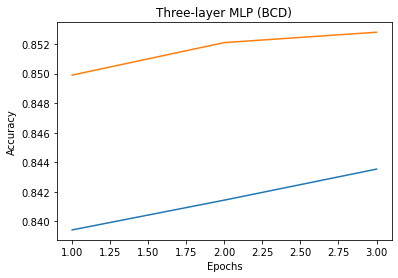

In [27]:

helpers.plot_results(n_iter, accuracies_train, accuracies_test, loss)